<a href="https://colab.research.google.com/github/dgscharan/Computer_vision/blob/main/sbibank_captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import pytesseract

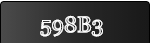

In [ ]:
img = cv2.imread('./MicrosoftTeams-image (8).png', 0)
cv2_imshow(img)

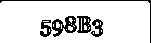

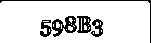

In [ ]:
ret, thresh = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

kernel = np.ones((1,1),np.uint8)
dilate = cv2.dilate(thresh,kernel,iterations = 1)
cv2_imshow(dilate)

In [ ]:
txt = pytesseract.image_to_string(dilate, config='-l eng --oem 1 --psm 7')
txt

'598E3\n\x0c'

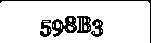

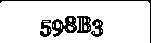

598E3



In [ ]:
from PIL import Image
pil_img = Image.open('./MicrosoftTeams-image (8).png')
cv_img =  (np.array(pil_img))
img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

kernel = np.ones((1,1),np.uint8)
dilate = cv2.dilate(thresh,kernel,iterations = 1)
cv2_imshow(dilate)

txt = pytesseract.image_to_string(dilate, config='-l eng --oem 1 --psm 7')
print(txt)

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install easyocr


     |████████████████████████████████| 48.9MB 88kB/s 


In [ ]:
import easyocr 
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
bounds = reader.readtext('6.JPG', detail=0, paragraph=True)
print(bounds)



['JA Kh t']


AttributeError: ignored

In [ ]:
def do_sbi(img):
    bounds = reader.readtext(img, detail=0, paragraph=True)
    return bounds

In [ ]:
do_sbi('./3.JPG')

['2j rn p']

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

str = listToString(bounds)
str

'JA Kh t'

In [ ]:
def remove_space(string): 
    return string.replace(" ", "") 

space_removed = remove_space(str)
space_removed

'JAKht'

In [ ]:
def remove_quotes(string):
    return string.replace("'", "")
  
remove_quotes(space_removed)


'JAKht'

In [ ]:
def sbicaptcha(img):
    bounds = reader.readtext(img, detail=0, paragraph=True)
    str1 = " "
    x = str1.join(bounds)
    y = x.replace(" ", "")
    print(y)

sbicaptcha('./6.JPG')



JAKht


In [ ]:
app = Flask(__name__)
@app.route("/api/v1/SbiCaptcha",methods = ["POST"])

def SbiCaptcha():
    pil_img = Image.open(request.files["sbicaptcha"])
    bounds = reader.readtext(pil_img, detail=0, paragraph=True)
    str1 = " "
    x = str1.join(bounds)
    y = x.replace(" ", "")
    print(y)
    OutputJson = {}
    OutputJson['text'] = y
    resp = Response(response = json.dumps(OutputJson),status=200,mimetype="application/json")
    return resp

    
if __name__ == '__main__':
    app.run(host = "0.0.0.0", port= 1947, debug=True)

